# Objetivo del notebook

Este notebook tiene como finalidad principal la visualizacion y comprension del conjunto de datos del que se dispone para llevar a cabo el desarrollo de un modelo capaz de precedir la supervivencia de los pasajeros que navegaron en el Titanic, en funcion de diferentes caracteristicas que evaluaremos a continuacion.

# Importar las librerias necesarias

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
!pip install seaborn --upgrade
import seaborn as sns

In [3]:
# Instancio un objeto DataFrame con el conjunto de datos a utilizar
dataset_train__route = "../data/raw/train.csv"
dataset_test__route = "../data/raw/test.csv"

train_df = pd.read_csv(dataset_train__route)
test_df = pd.read_csv(dataset_test__route)

In [4]:
# Muestro los 5 primeros ejemplos del dataset de entrenamiento
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Muestro los 5 primeros ejemplos del dataset de testing
test_df.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Muestro un dataframe con informacion estadisticas de aquellas variables registradas con valores continuos numericos
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Pairplot

### Conjunto de entrenamiento

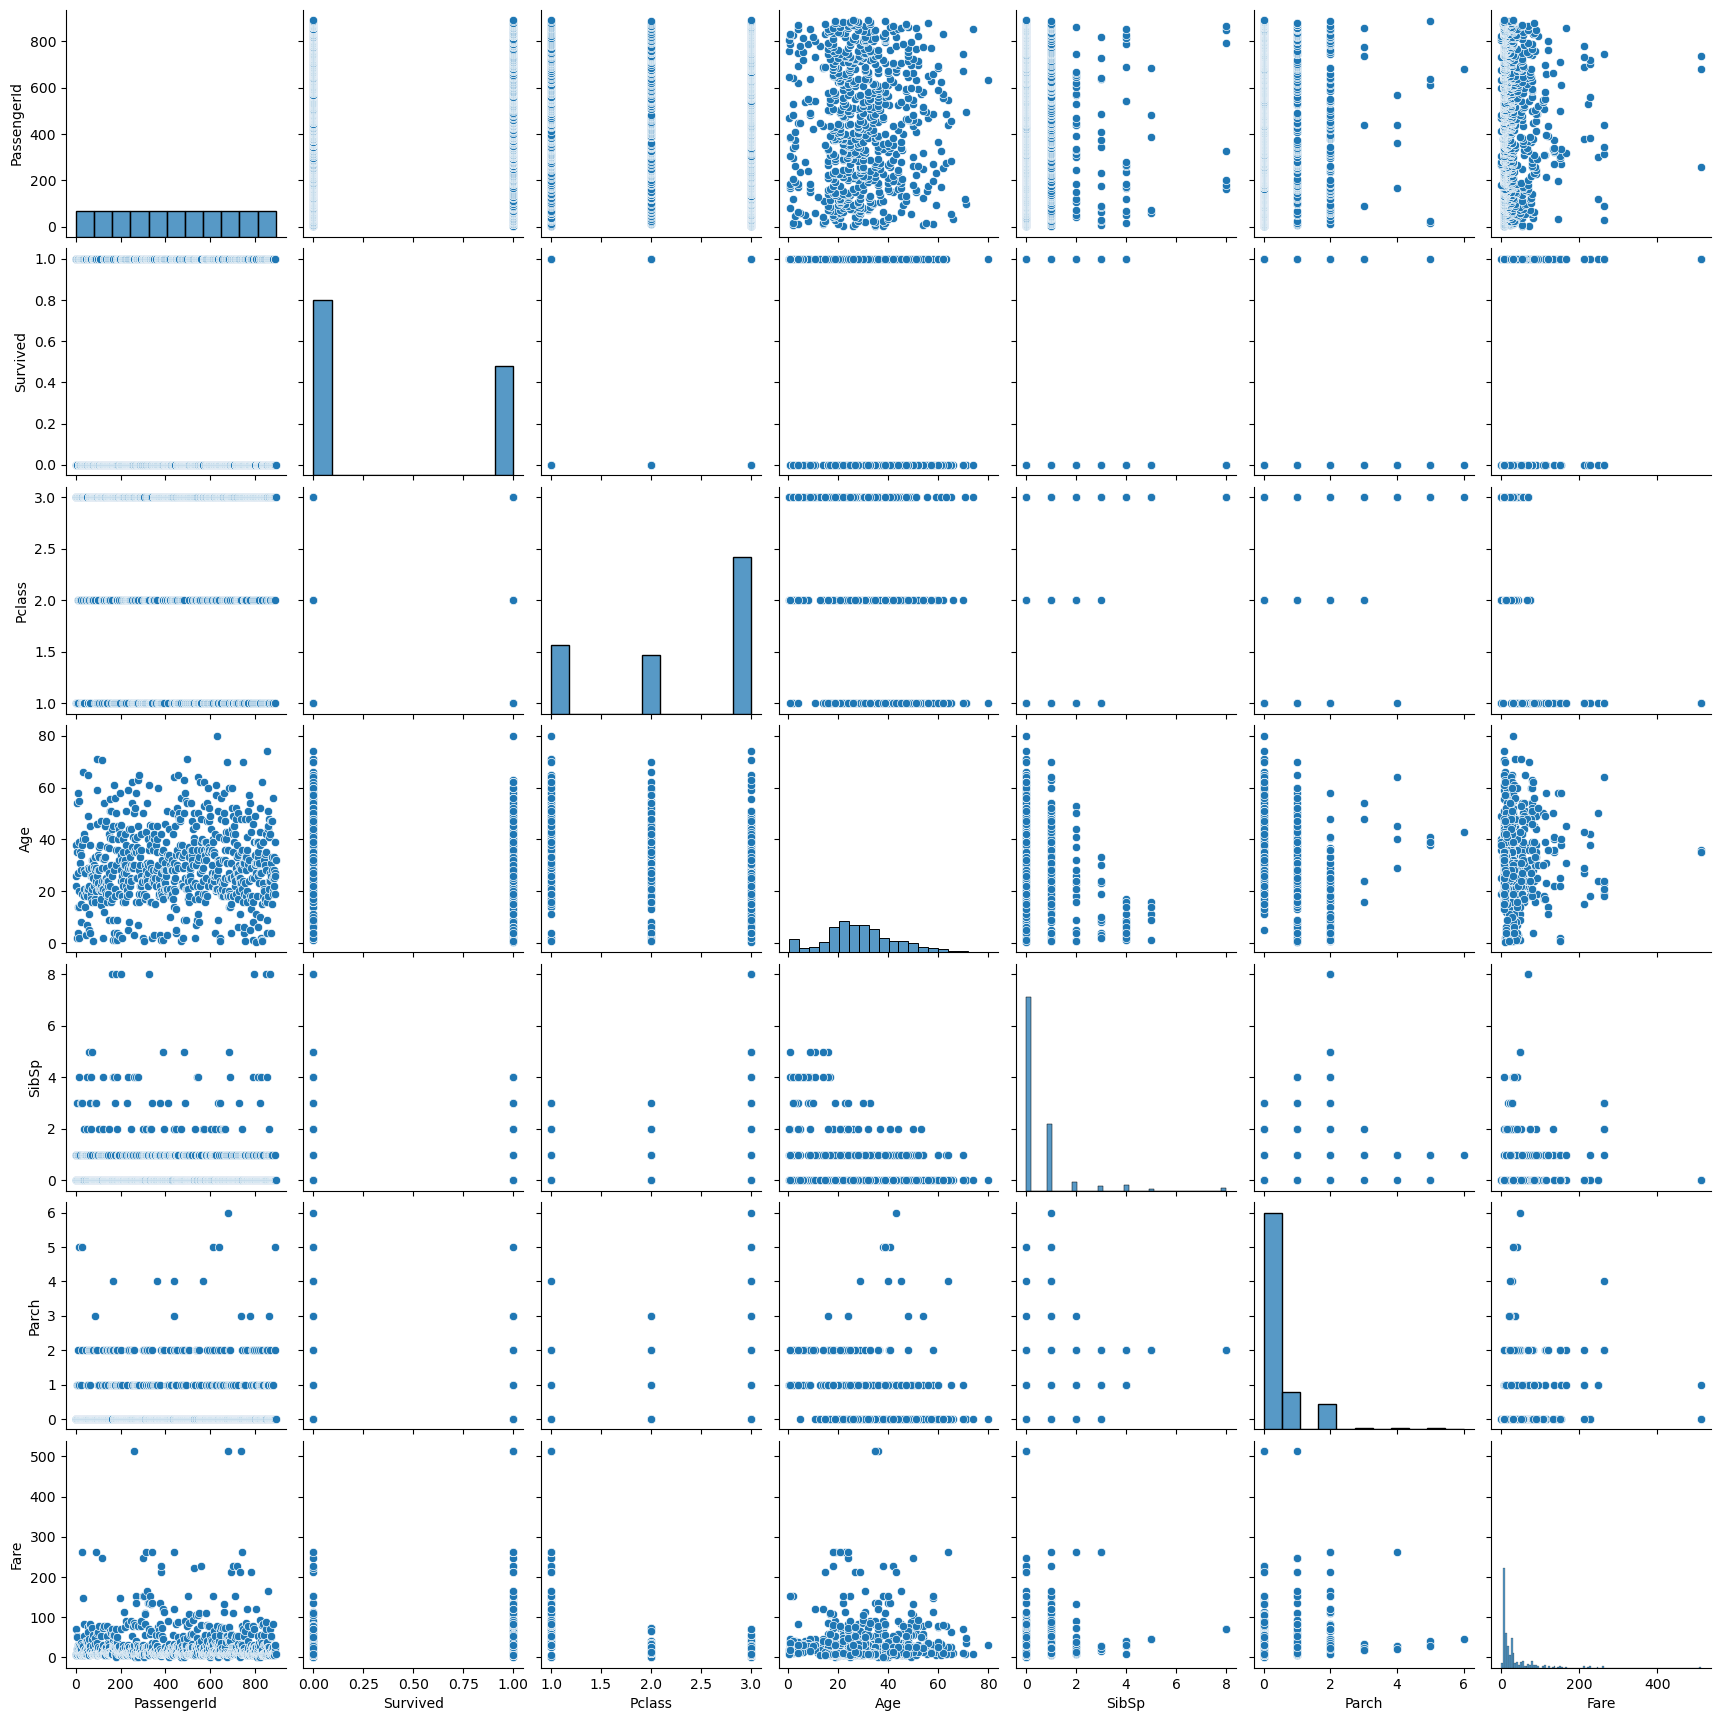

In [29]:
sns.pairplot(train_df)

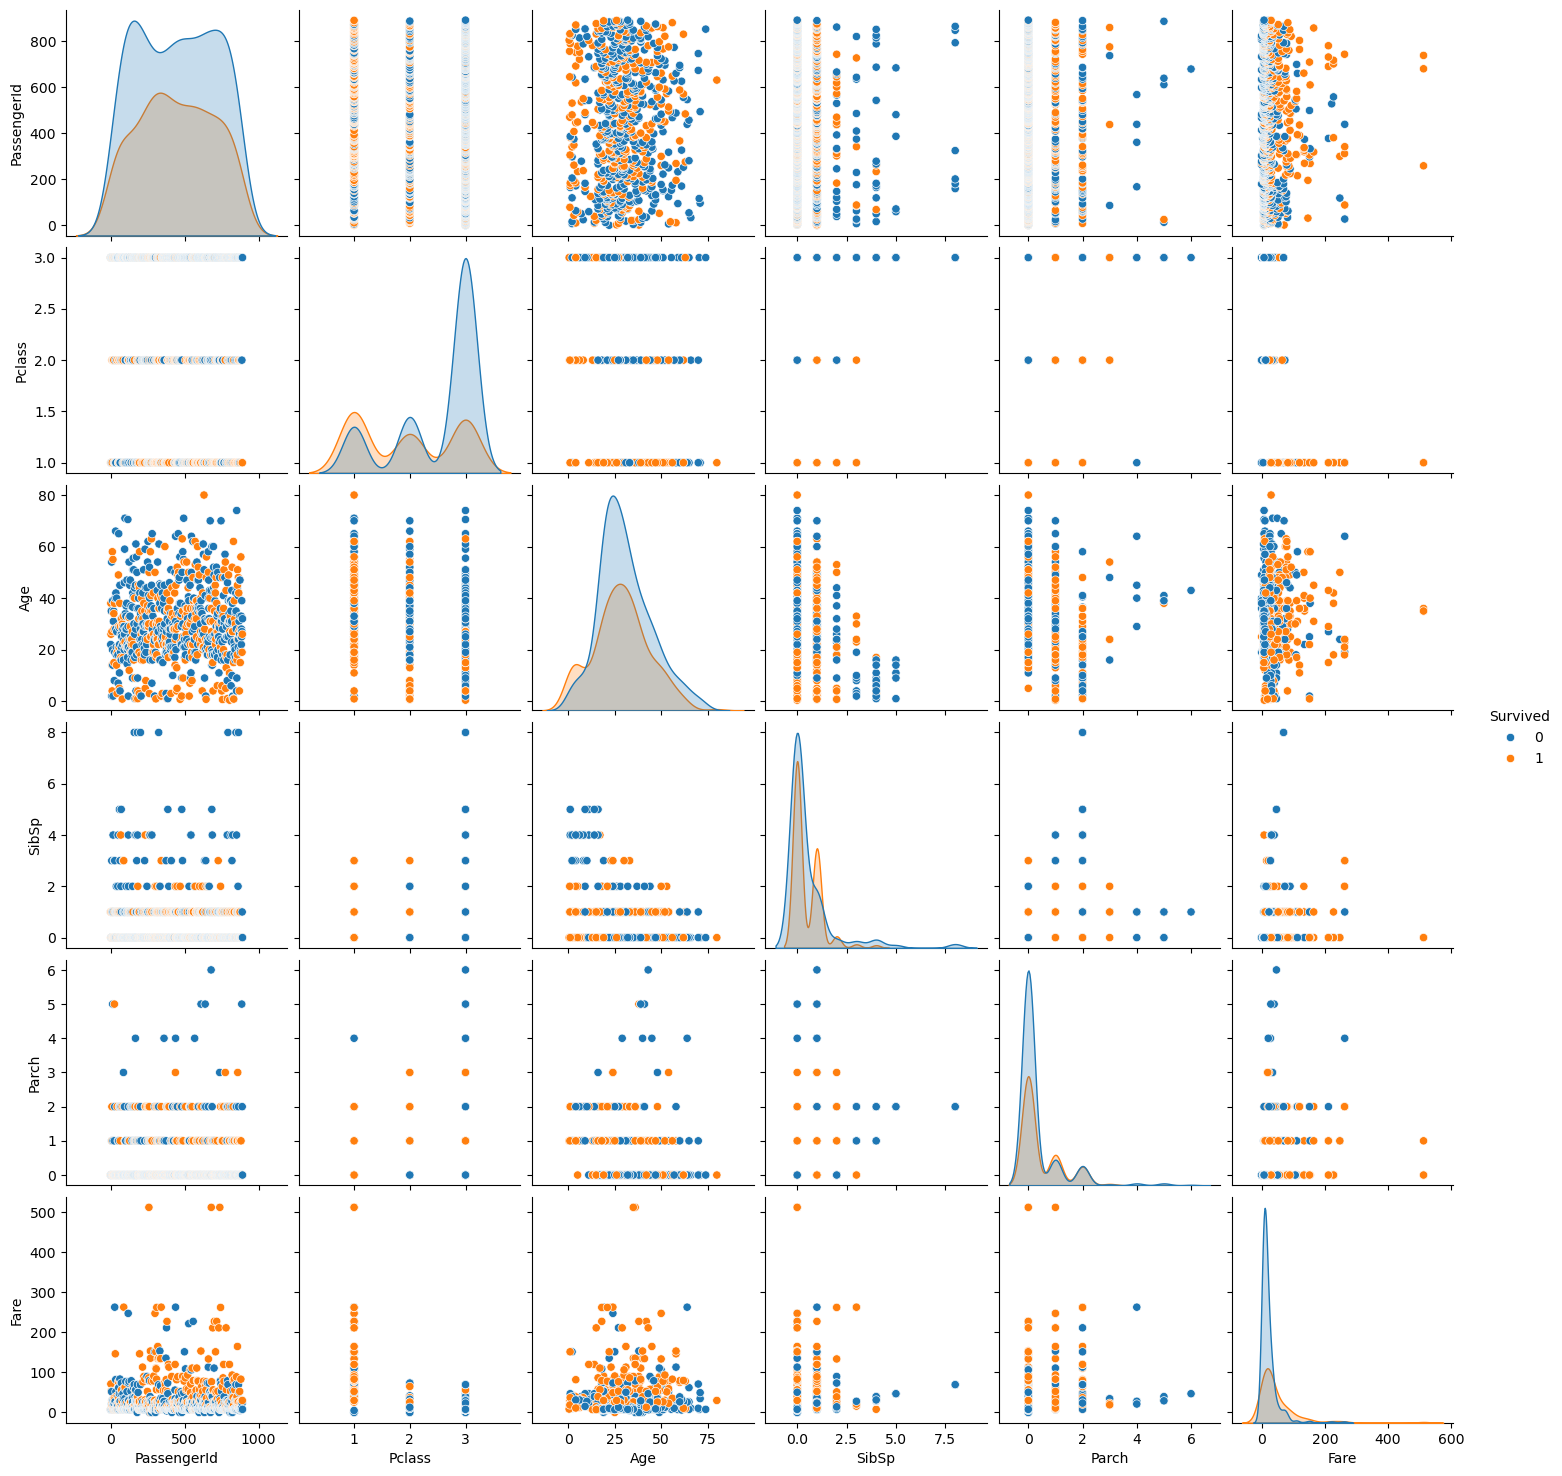

In [30]:
sns.pairplot(train_df, hue = "Survived")

### Conjunto de testing

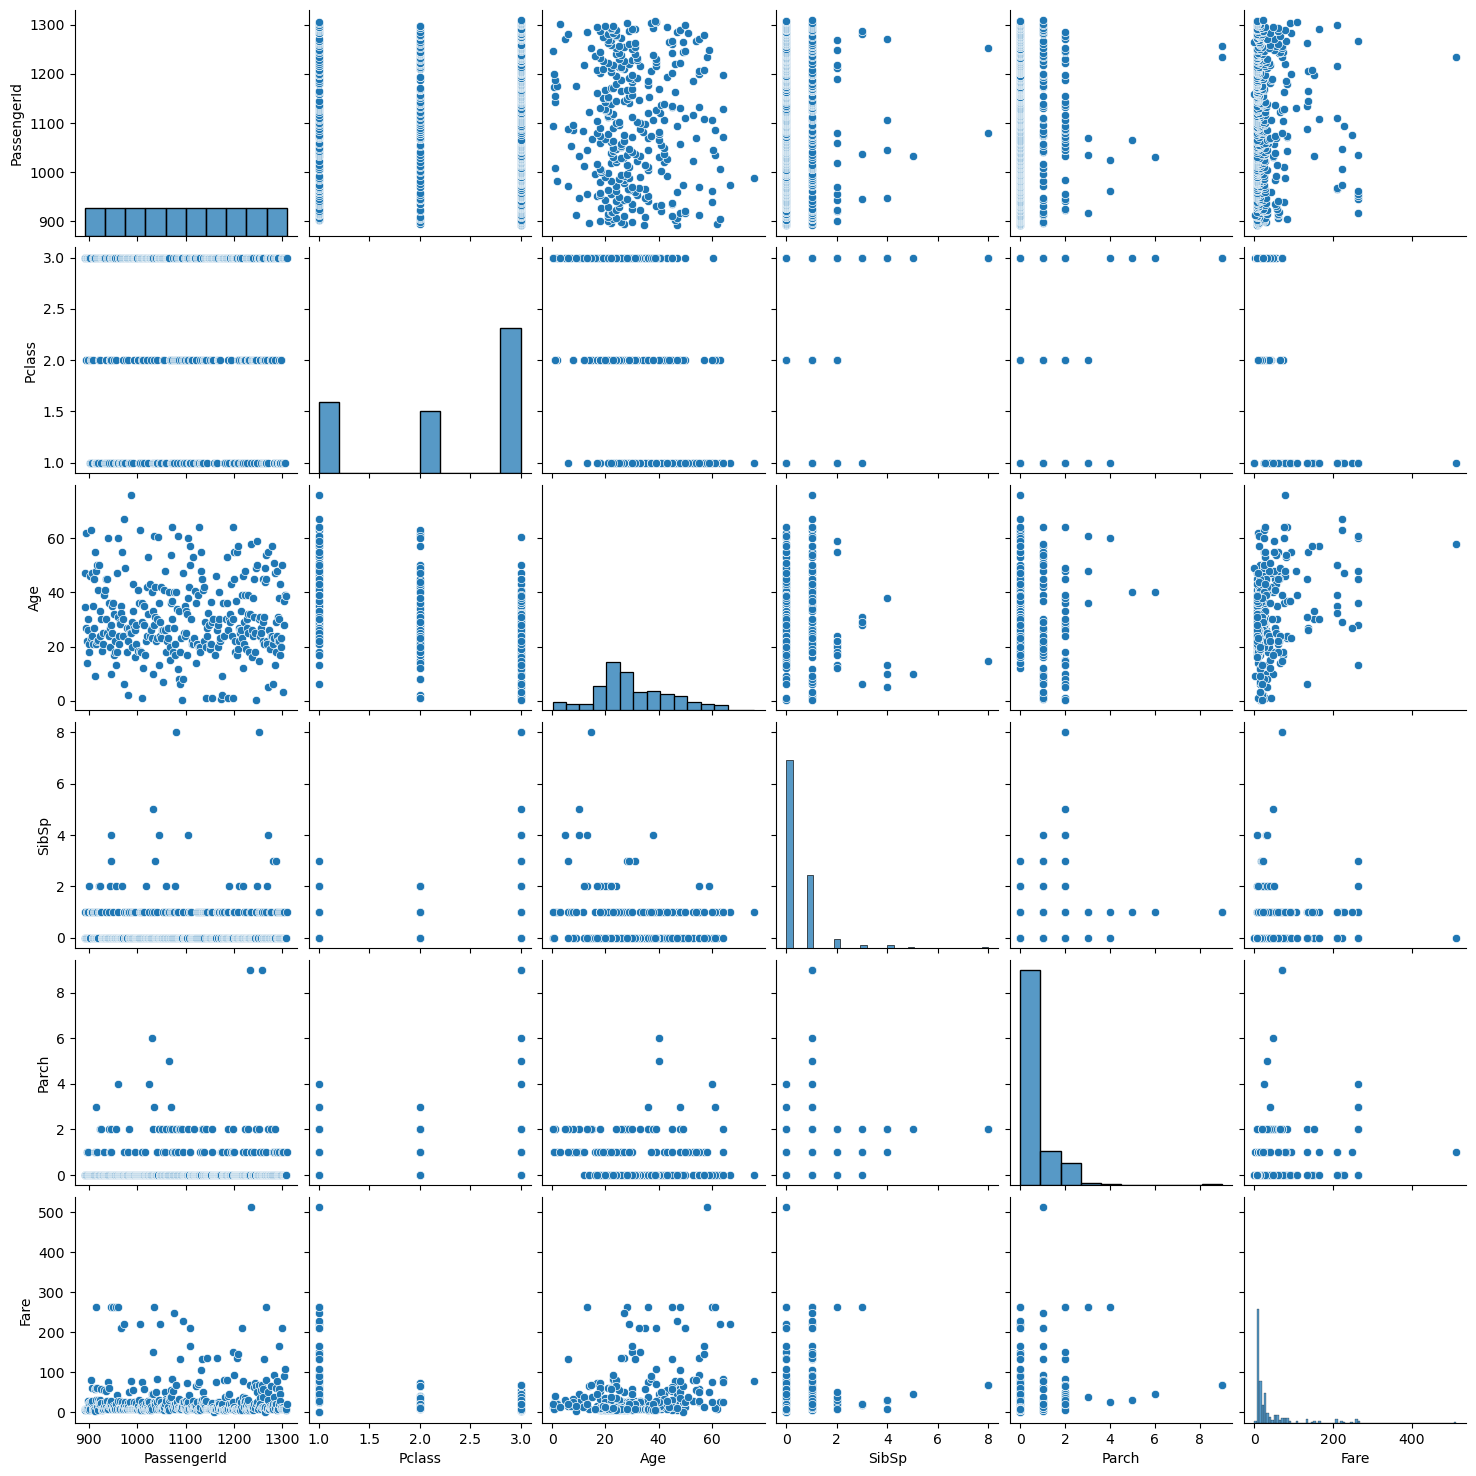

In [31]:
sns.pairplot(test_df)

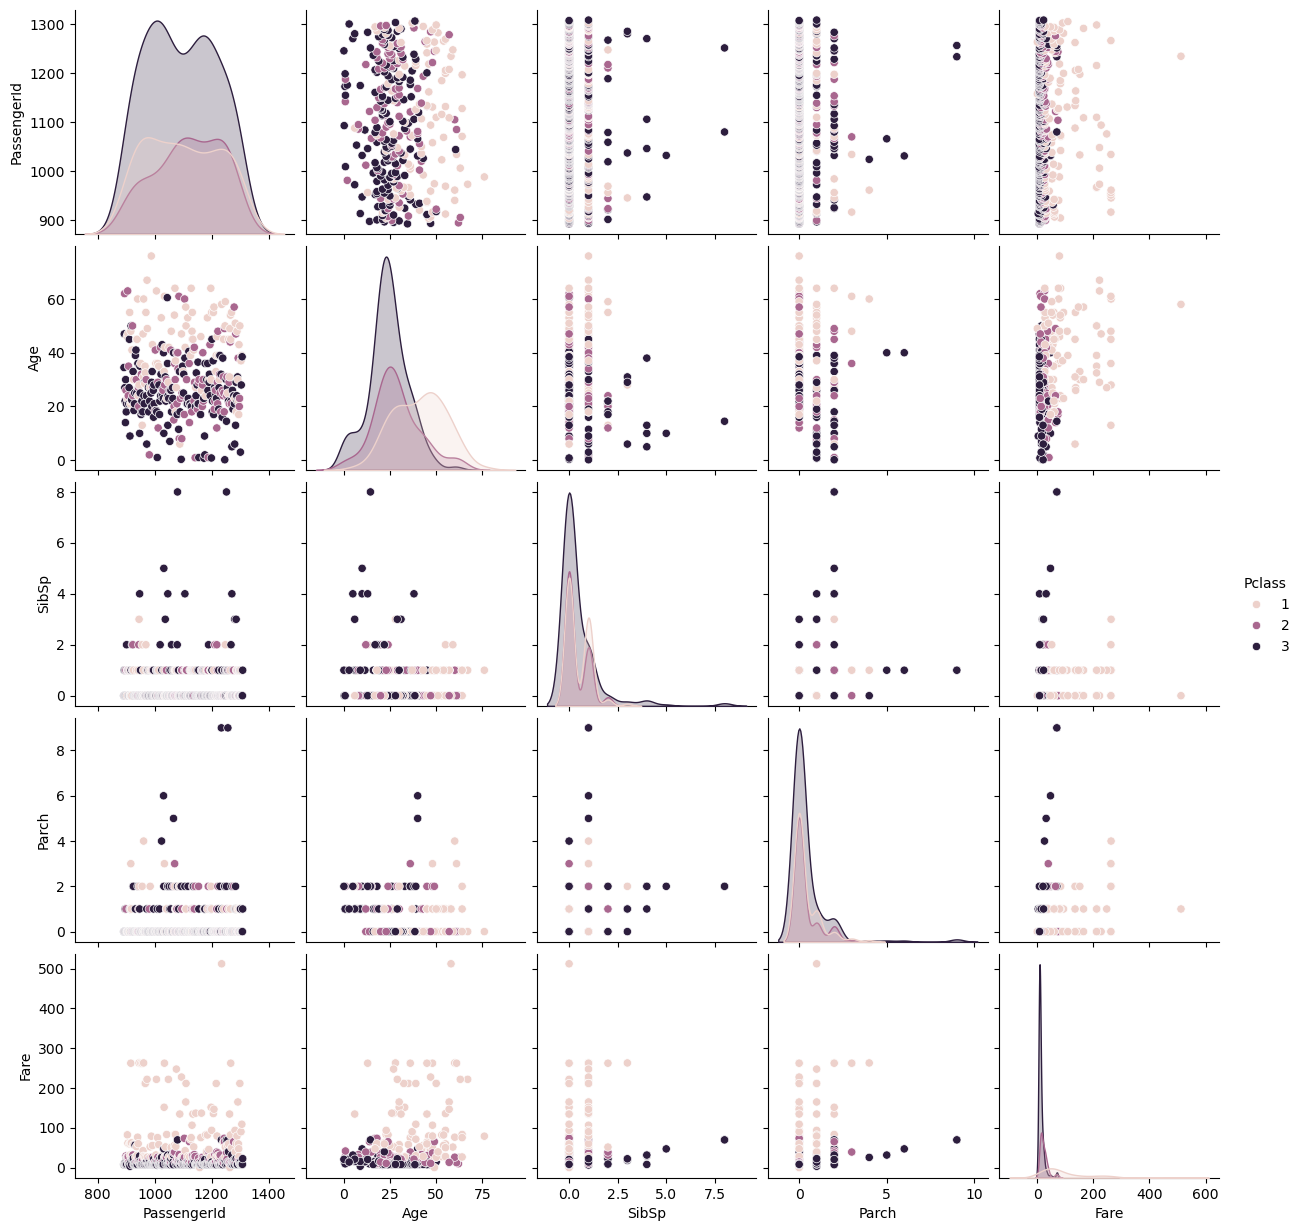

In [35]:
sns.pairplot(test_df, hue = "Pclass")

## Correlacion


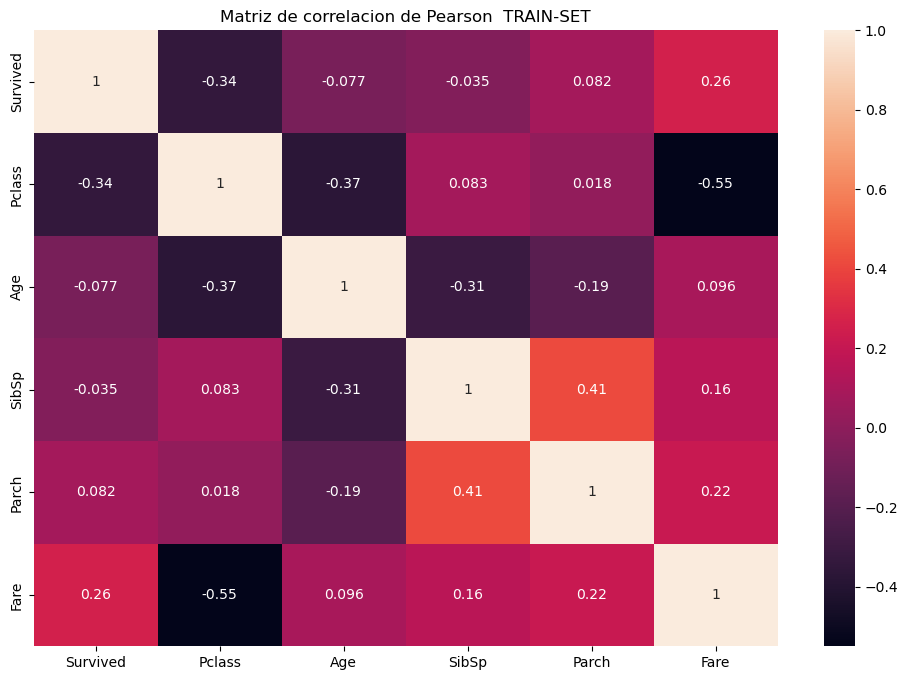

In [16]:
# Matriz de correlacion del conjunto de datos de entrenamiento
# Excluyo todas las variables que no contienen valores continuos (las procesare despues)
corr_matrix__train = train_df.drop(columns = ['Name', 'Cabin', 'PassengerId', 'Ticket', 'Sex', 'Embarked']).corr()

plt.figure(figsize = (12, 8), dpi=100)
sns.heatmap(corr_matrix__train, annot = True)
plt.title("Matriz de correlacion de Pearson  TRAIN-SET")
plt.show()

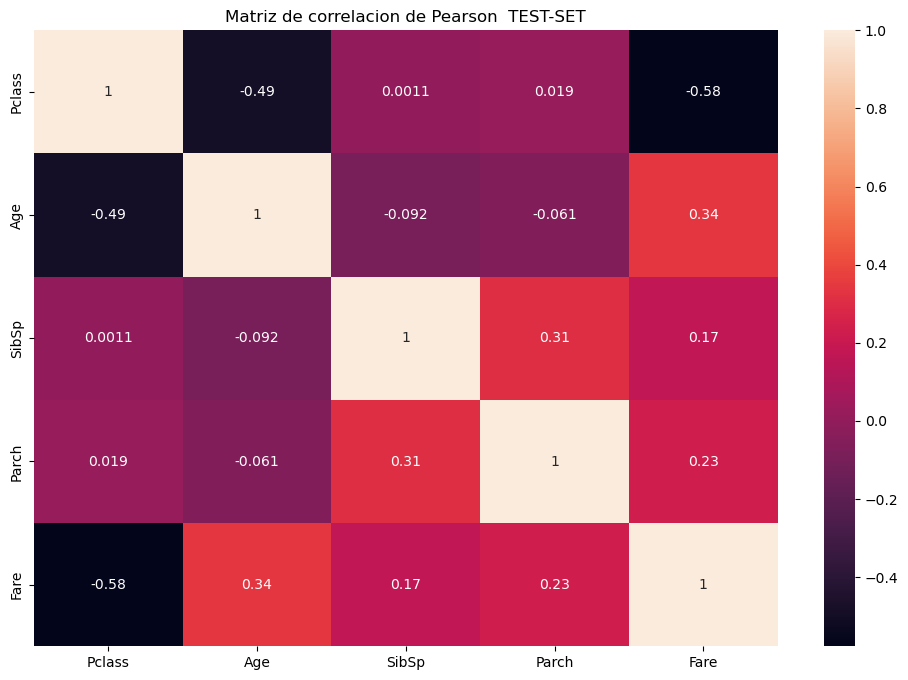

In [12]:
corr_matrix__test = test_df.drop(columns = ['Name', 'Cabin', 'PassengerId', 'Ticket', 'Sex', 'Embarked']).corr()

plt.figure(figsize = (12, 8))
sns.heatmap(corr_matrix__test, annot = True)
plt.title("Matriz de correlacion de Pearson  TEST-SET")
plt.show()

## Distribuciones de datos

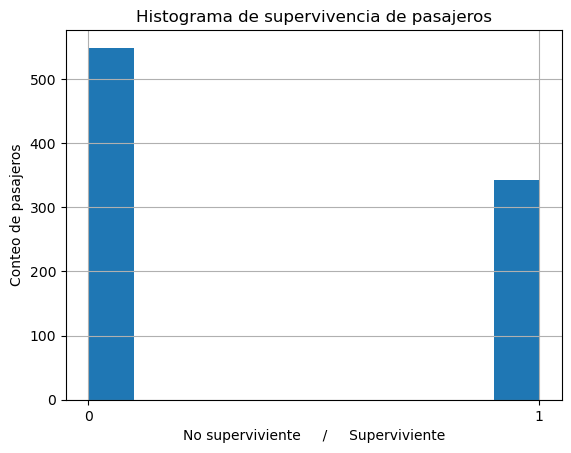

In [23]:
## Histograma de la variable objetivo (dataset entrenamiento)
plt.figure()
train_df['Survived'].hist()
plt.title("Histograma de supervivencia de pasajeros")
plt.xlabel("No superviviente     /     Superviviente")
plt.ylabel("Conteo de pasajeros")
plt.xticks(range(0, 2, 1))
plt.show()

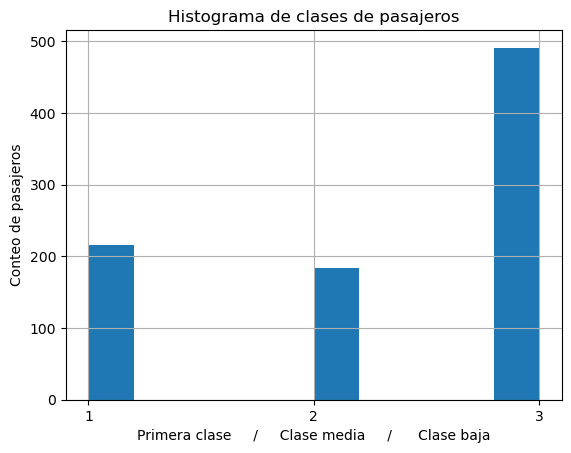

In [24]:
## Distribucion de clases en el conjunto de entrenamiento

plt.figure()
train_df['Pclass'].hist()
plt.title("Histograma de clases de pasajeros")
plt.xlabel("Primera clase     /     Clase media     /      Clase baja")
plt.ylabel("Conteo de pasajeros")
plt.xticks(range(1, 4, 1))
plt.show()